# Advanced Data Science Capstone Project
Sayaka Minegishi

## Use Case
This project will utilize the Leukemia Dataset uploaded to Kaggle by Nikhil Sharma to a program that classifies whether a patient has acute lymphoblastic leukemia, given an image of bone marrow aspirate smear. 

In [7]:
pip install tensorflow

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install --user --upgrade tensorflow


/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 454.3 MB 25 kB/s s eta 0:00:01    |██████▏                         | 87.9 MB 41.9 MB/s eta 0:00:09     |███████████                     | 157.3 MB 11.7 MB/s eta 0:00:26     |█████████████████████           | 297.4 MB 52.8 MB/s eta 0:00:03
     |████████████████████████████████| 42 kB 2.5 MB/s  eta 0:00:01
     |████████████████████████████████| 6.0 MB 37.7 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 41.2 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 40.1 MB/s eta 0:0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install keras==2.3.1

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 377 kB 18.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [63]:
#pip install tf-nightly
#os.listdir("./")

# import shutil
# shutil.rmtree("./__MACOSX")
# os.remove("./ALL_negative.zip")

Download all the images for ALL lukemia positive individuals using IBM Cloud's object storage.

In [64]:
#ALL_POSITIVE credentials
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_8 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-62a11686-a522-45e1-9d33-be942e569d01',
    'IBM_API_KEY_ID': 'AyDmNB01z7kaQWR4dCKsn7kmKj5OQ1dQRsDhMpSid0zy',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'coursera-donotdelete-pr-axcazqc6bchxob',
    'FILE': 'ALL_ps2.zip'
}


In [65]:
from ibm_botocore.client import Config
import ibm_boto3

cos8 = ibm_boto3.client(service_name = 's3', 
                       ibm_api_key_id = credentials_8['IBM_API_KEY_ID'],
                       ibm_service_instance_id = credentials_8['IAM_SERVICE_ID'],
                       ibm_auth_endpoint = credentials_8['IBM_AUTH_ENDPOINT'],
                       config = Config(signature_version='oauth'),
                       endpoint_url = credentials_8['ENDPOINT'])
                           
                       
        

In [66]:
#download the zip file containing ALL positive images

cos8.download_file(Bucket = credentials_8['BUCKET'], Key = 'ALL_ps2.zip', Filename = 'ALL_ps2.zip')



In [67]:
#extract the contents of the ALL_positive zip file
from zipfile import*
print('Extract all files in ALL_positive.zip to the current directory')
with ZipFile('ALL_ps2.zip', 'r') as zipObj:
    zipObj.extractall() #extract the contents of the zip file

Extract all files in ALL_positive.zip to the current directory


In [68]:
import os
os.listdir("./ALL_ps2") #check that the files are in the directory

['Im020_1.jpeg',
 '._Im015_1.jpeg',
 '._Im111_1.jpeg',
 'Im012_1.jpeg',
 'Im089_1.jpeg',
 'Im042_1.jpeg',
 'Im049_1.jpeg',
 '._Im027_1.jpeg',
 'Im011_1.jpeg',
 'Im070_1.jpeg',
 '._Im022_1.jpeg',
 'Im075_1.jpeg',
 'Im006_1.jpeg',
 '._Im016_1.jpeg',
 '._Im007_1.jpeg',
 '._Im066_1.jpeg',
 'Im099_1.jpeg',
 '._Im028_1.jpeg',
 '._Im057_1.jpeg',
 '._Im004_1.jpeg',
 'Im067_1.jpeg',
 '._Im050_1.jpeg',
 '._Im025_1.jpeg',
 'Im079_1.jpeg',
 '._Im029_1.jpeg',
 'Im039_1.jpeg',
 '._Im020_1.jpeg',
 '._Im013_1.jpeg',
 '._Im064_1.jpeg',
 '._Im086_1.jpeg',
 '._Im127_1.jpeg',
 'Im048_1.jpeg',
 'Im030_1.jpeg',
 'Im095_1.jpeg',
 'Im069_1.jpeg',
 '._Im021_1.jpeg',
 '._Im019_1.jpeg',
 '._Im011_1.jpeg',
 '._Im073_1.jpeg',
 'Im125_1.jpeg',
 'Im088_1.jpeg',
 'Im066_1.jpeg',
 '._Im063_1.jpeg',
 'Im127_1.jpeg',
 '._Im001_1.jpeg',
 'Im047_1.jpeg',
 'Im097_1.jpeg',
 '._Im109_1.jpeg',
 '._Im094_1.jpeg',
 'Im064_1.jpeg',
 'Im128_1.jpeg',
 '._Im085_1.jpeg',
 '._Im072_1.jpeg',
 '._Im039_1.jpeg',
 'Im026_1.jpeg',
 'Im113

Download the image files for ALL negative individuals

In [69]:
#ALL_nv2
# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_7 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-62a11686-a522-45e1-9d33-be942e569d01',
    'IBM_API_KEY_ID': 'AyDmNB01z7kaQWR4dCKsn7kmKj5OQ1dQRsDhMpSid0zy',
    'ENDPOINT': 'https://s3-api.us-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'coursera-donotdelete-pr-axcazqc6bchxob',
    'FILE': 'ALL_nv2.zip'
}


In [70]:
cos7 = ibm_boto3.client(service_name = 's3', 
                       ibm_api_key_id = credentials_7['IBM_API_KEY_ID'],
                       ibm_service_instance_id = credentials_7['IAM_SERVICE_ID'],
                       ibm_auth_endpoint = credentials_7['IBM_AUTH_ENDPOINT'],
                       config = Config(signature_version='oauth'),
                       endpoint_url = credentials_7['ENDPOINT'])
                           
                       
        

In [71]:
#download the zip file containing ALL negative images

cos7.download_file(Bucket = credentials_7['BUCKET'], Key = 'ALL_nv2.zip', Filename = 'ALL_nv2.zip')


In [72]:
#extract the zip file for ALL negative images
print('Extract all files in ALL_negative.zip to the current directory')
with ZipFile('ALL_nv2.zip', 'r') as zipObj:
    zipObj.extractall() #extract the contents of the zip file

Extract all files in ALL_negative.zip to the current directory


In [73]:
os.listdir("./ALL_nv2") #check that the files are in the directory

['Im219_0.jpeg',
 'Im167_0.jpeg',
 '._Im241_0.jpeg',
 'Im137_0.jpeg',
 'Im227_0.jpeg',
 'Im234_0.jpeg',
 'Im132_0.jpeg',
 '._Im149_0.jpeg',
 'Im195_0.jpeg',
 'Im221_0.jpeg',
 'Im251_0.jpeg',
 'Im240_0.jpeg',
 '._Im141_0.jpeg',
 'Im198_0.jpeg',
 '._Im173_0.jpeg',
 '._Im230_0.jpeg',
 'Im188_0.jpeg',
 'Im256_0.jpeg',
 '._Im176_0.jpeg',
 'Im182_0.jpeg',
 '._Im164_0.jpeg',
 '._Im190_0.jpeg',
 'Im259_0.jpeg',
 '._Im146_0.jpeg',
 '._Im206_0.jpeg',
 'Im180_0.jpeg',
 '._Im213_0.jpeg',
 'Im226_0.jpeg',
 '._Im207_0.jpeg',
 '._Im154_0.jpeg',
 'Im138_0.jpeg',
 'Im238_0.jpeg',
 '._Im183_0.jpeg',
 'Im134_0.jpeg',
 '._Im218_0.jpeg',
 'Im150_0.jpeg',
 '._Im153_0.jpeg',
 '._Im156_0.jpeg',
 '._Im195_0.jpeg',
 'Im174_0.jpeg',
 'Im179_0.jpeg',
 'Im157_0.jpeg',
 '._Im163_0.jpeg',
 'Im208_0.jpeg',
 '._Im162_0.jpeg',
 'Im155_0.jpeg',
 'Im207_0.jpeg',
 '._Im214_0.jpeg',
 '._Im234_0.jpeg',
 '._Im237_0.jpeg',
 '._Im196_0.jpeg',
 '._Im205_0.jpeg',
 'Im161_0.jpeg',
 '._Im144_0.jpeg',
 '._Im200_0.jpeg',
 '._Im160_0

In [74]:
from __future__ import print_function
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

import tensorflow as tf
import numpy as np
import PIL
from PIL import Image

In [75]:
#assign variables to the folders containing leukemia positive and negative images

path_allpositive = "./ALL_ps2/"
path_allnegative = "./ALL_nv2/"
ALL_negative = os.listdir("./ALL_nv2")
ALL_positive = os.listdir("./ALL_ps2")

In [76]:
#create arrays so they store the entire path for the disease-positive and disease-negative images

ALLnegative= []
ALLpositive = []

In [77]:

#for the disease-positive images
for image in ALL_positive:
    image = str(path_allpositive)+ str(image)
    ALLpositive.append(image)
#for the disease-negative images
for file in ALL_negative:
    file = path_allnegative + file
    ALLnegative.append(file)

## Initial Data Exploration
capstone.data_exp.<Python>.<v3.7>.<0>

In [78]:
#check that the new arrays have been created properly
print(ALLpositive)
print(ALLnegative)

['./ALL_ps2/Im020_1.jpeg', './ALL_ps2/._Im015_1.jpeg', './ALL_ps2/._Im111_1.jpeg', './ALL_ps2/Im012_1.jpeg', './ALL_ps2/Im089_1.jpeg', './ALL_ps2/Im042_1.jpeg', './ALL_ps2/Im049_1.jpeg', './ALL_ps2/._Im027_1.jpeg', './ALL_ps2/Im011_1.jpeg', './ALL_ps2/Im070_1.jpeg', './ALL_ps2/._Im022_1.jpeg', './ALL_ps2/Im075_1.jpeg', './ALL_ps2/Im006_1.jpeg', './ALL_ps2/._Im016_1.jpeg', './ALL_ps2/._Im007_1.jpeg', './ALL_ps2/._Im066_1.jpeg', './ALL_ps2/Im099_1.jpeg', './ALL_ps2/._Im028_1.jpeg', './ALL_ps2/._Im057_1.jpeg', './ALL_ps2/._Im004_1.jpeg', './ALL_ps2/Im067_1.jpeg', './ALL_ps2/._Im050_1.jpeg', './ALL_ps2/._Im025_1.jpeg', './ALL_ps2/Im079_1.jpeg', './ALL_ps2/._Im029_1.jpeg', './ALL_ps2/Im039_1.jpeg', './ALL_ps2/._Im020_1.jpeg', './ALL_ps2/._Im013_1.jpeg', './ALL_ps2/._Im064_1.jpeg', './ALL_ps2/._Im086_1.jpeg', './ALL_ps2/._Im127_1.jpeg', './ALL_ps2/Im048_1.jpeg', './ALL_ps2/Im030_1.jpeg', './ALL_ps2/Im095_1.jpeg', './ALL_ps2/Im069_1.jpeg', './ALL_ps2/._Im021_1.jpeg', './ALL_ps2/._Im019_1.jpeg

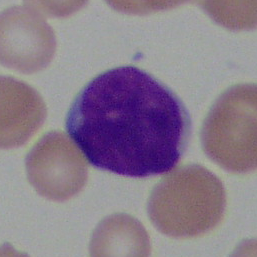

In [79]:
#open first image in ALL_positive
PIL.Image.open(ALLpositive[6], mode= 'r') 

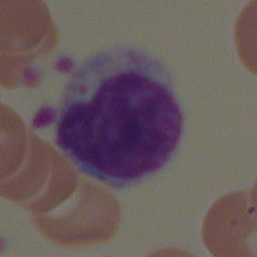

In [80]:
#examine another image at random
PIL.Image.open(ALLnegative[5], mode= 'r')

In [81]:
#Initial data exploration - find the size of data
print("Number of images that show cells from individuals who do not have acute lymphoblastic leukemia: ", len(ALLnegative))
print("Number of images that show cells from patients who test positive for acute lymphoblastic leukemia: ", len(ALLpositive))


Number of images that show cells from individuals who do not have acute lymphoblastic leukemia:  260
Number of images that show cells from patients who test positive for acute lymphoblastic leukemia:  260


### Visualizations

#### Quality Issues

The dataset contains images of bone marrow aspirate smears from individuals, which depict their lumphocytes.

The data contains 189 images from individuals who do not have acute lumphoblastic leukemia and 130 images from individuals who test positive for acute lymphoblastic leukemia. 

Originally, the dataset contained one file that was not an image file ('.DS_Store'). Since this program will be an image classification program, I removed this unnecessary file from the final dataset. There were no missing values or wrong measurements.

#### Feature Quality

Since my dataset is composed of images for classification, feature quality cannot be assessed by numerical measures. However, all images show bone marrow aspirate smears and are thus comparable and relevant to the program. 

#### Value Distribution of Data

The data contains 189 images from individuals who do not have acute lumphoblastic leukemia and 130 images from individuals who test positive for acute lymphoblastic leukemia. 

Since the data used in this project is not numerical, it is not possible to examine the value distribution of data using visual or statistical methods. 

## Extract, Transform, Load (ETL)

In [82]:
#clean data by removing 'DS_Store' file from each list
for entryname in ALLnegative:
    if (entryname == './ALL_negative/.DS_Store'):
        ALLnegative.remove(entryname)
    
for entry in ALLpositive:
    if (entry == './ALL_positive/.DS_Store'):
        ALLpositive.remove(entry)
        

In [83]:
#check that the new arrays have been created properly
print(ALLpositive)
print(ALLnegative)

['./ALL_ps2/Im020_1.jpeg', './ALL_ps2/._Im015_1.jpeg', './ALL_ps2/._Im111_1.jpeg', './ALL_ps2/Im012_1.jpeg', './ALL_ps2/Im089_1.jpeg', './ALL_ps2/Im042_1.jpeg', './ALL_ps2/Im049_1.jpeg', './ALL_ps2/._Im027_1.jpeg', './ALL_ps2/Im011_1.jpeg', './ALL_ps2/Im070_1.jpeg', './ALL_ps2/._Im022_1.jpeg', './ALL_ps2/Im075_1.jpeg', './ALL_ps2/Im006_1.jpeg', './ALL_ps2/._Im016_1.jpeg', './ALL_ps2/._Im007_1.jpeg', './ALL_ps2/._Im066_1.jpeg', './ALL_ps2/Im099_1.jpeg', './ALL_ps2/._Im028_1.jpeg', './ALL_ps2/._Im057_1.jpeg', './ALL_ps2/._Im004_1.jpeg', './ALL_ps2/Im067_1.jpeg', './ALL_ps2/._Im050_1.jpeg', './ALL_ps2/._Im025_1.jpeg', './ALL_ps2/Im079_1.jpeg', './ALL_ps2/._Im029_1.jpeg', './ALL_ps2/Im039_1.jpeg', './ALL_ps2/._Im020_1.jpeg', './ALL_ps2/._Im013_1.jpeg', './ALL_ps2/._Im064_1.jpeg', './ALL_ps2/._Im086_1.jpeg', './ALL_ps2/._Im127_1.jpeg', './ALL_ps2/Im048_1.jpeg', './ALL_ps2/Im030_1.jpeg', './ALL_ps2/Im095_1.jpeg', './ALL_ps2/Im069_1.jpeg', './ALL_ps2/._Im021_1.jpeg', './ALL_ps2/._Im019_1.jpeg

### Data Cleansing

In [84]:
#check that there are no duplicates in images from either the leukemia-positive or leukemia-negative lists by comparing the length of each list to the number of unique entries

#check duplicates for ALLpositive

if len(ALLpositive) != len(set(ALLpositive)):
    print("Duplicate images present in ALLpositive.")
else:
    print("No duplicate images present in ALLpositive.")

#check for duplicates in ALLnegative
if len(ALLnegative) != len(set(ALLnegative)):
    print("Duplicate iamges present in ALLnegative")
else:
    print("No duplicate images present in ALLnegative")


No duplicate images present in ALLpositive.
No duplicate images present in ALLnegative


#### Documentation of my ETL process from above:
I have previously stored my data to IBM Cloud's object storage service for easier access. I did this at the start of this project so that I could see my data to create the visualizations. I also made two lists to store the paths to each image in my data set: one list to store the image of bone-marrow aspirate smear from leukemia-positive individuals and one to store the images from leukemia-negative individuals. By creating such lists, I am able to access the images more easily. Upon examination of the two lists, I found that one of the lists contained a file called 'DS_store' which was not relevant to my analysis, so I removed this file.

#### Data Cleansing
All data types are consistently stored as a string. From examination of entries in the ALLpositive and ALLnegative lists, the values in ALLpositive and ALLnegative are non-null.
Furthermore, every image in the dataset is unique, as checked in the above cell.


## Feature Creation

In [85]:
batch_size = 32
img_height = 180
img_width = 180

data_directory = "./" #define the path to the directory where leukemia images are stored

In [86]:
os.listdir(data_directory)

import shutil
if('__MACOSX' in os.listdir(data_directory)):
    shutil.rmtree('__MACOSX') #remove an uncessary directory

In [87]:
os.listdir(data_directory)

['ALL_ps2.zip', 'ALL_nv2', 'ALL_nv2.zip', 'ALL_ps2']

In [103]:
#define training data using 80% of the images for training
training_data = tf.keras.preprocessing.image_dataset_from_directory(
data_directory,
validation_split = 0.2, #use 20% of the data for testing
subset = "training",
seed = 100,
image_size = (img_height, img_width), 
batch_size = batch_size)

Found 520 files belonging to 2 classes.
Using 416 files for training.


In [104]:
#define validation set
validation_data = tf.keras.preprocessing.image_dataset_from_directory(
data_directory,
validation_split = 0.2,
subset = "validation",
seed = 100,
image_size = (img_height, img_width),
batch_size = batch_size)

Found 520 files belonging to 2 classes.
Using 104 files for validation.


In [105]:
#check that the name of the classes are correct (leukemia-positive and leukemia-negative)
print(training_data.class_names)


['ALL_nv2', 'ALL_ps2']


In [106]:
# #configure our training and validation data with buffered prefetching for smooth access to data

# Autotune = tf.data.AUTOTUNE
# training_data = training_data.cache().shuffle(100).prefetch(buffer_size = Autotune)
# validation_data = validation_data.cache().prefetch(buffer_size = Autotune)


## Model Definition

The model performance indicator that I will use in this project is accuracy score

In [107]:
from tensorflow.keras import layers
#define the model
num_classes = 2

model = Sequential([
    layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(num_classes)
                
])




In [113]:
#compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [114]:
model.fit(training_data, validation_data = validation_data, batch_size = batch_size, epochs = 10, verbose = 1)


Epoch 1/10


InvalidArgumentError:  Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_2697]

Function call stack:
train_function


In [109]:
pip install opencv-python

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


SyntaxError: invalid syntax (<ipython-input-120-c379c5139684>, line 1)

In [115]:

def check_images( s_dir, ext_list):
    bad_images=[]
    bad_ext=[]
    s_list= os.listdir(s_dir)
    for klass in s_list:
        klass_path=os.path.join (s_dir, klass)
        print ('processing class directory ', klass)
        if os.path.isdir(klass_path):
            file_list=os.listdir(klass_path)
            for f in file_list:               
                f_path=os.path.join (klass_path,f)
                index=f.rfind('.')
                ext=f[index+1:].lower()
                if ext not in ext_list:
                    print('file ', f_path, ' has an invalid extension ', ext)
                    bad_ext.append(f_path)
                if os.path.isfile(f_path):
                    try:
                        img=cv2.imread(f_path)
                        shape=img.shape
                    except:
                        print('file ', f_path, ' is not a valid image file')
                        bad_images.append(f_path)
                else:
                    print('*** fatal error, you a sub directory ', f, ' in class directory ', klass)
        else:
            print ('*** WARNING*** you have files in ', s_dir, ' it should only contain sub directories')
    return bad_images, bad_ext

source_dir =r'c:\temp\people\storage'
good_exts=['jpg', 'png', 'jpeg', 'gif', 'bmp' ] # list of acceptable extensions
bad_file_list, bad_ext_list=check_images(source_dir, good_exts)
if len(bad_file_list) !=0:
    print('improper image files are listed below')
    for i in range (len(bad_file_list)):
        print (bad_file_list[i])
else:
    print(' no improper image files were found')

ImportError: libGL.so.1: cannot open shared object file: No such file or directory

In [110]:
#train the model
epochs = 10
history = model.fit(training_data,
                    validation_data = validation_data,
                    epochs = epochs)

Epoch 1/10


InvalidArgumentError:  Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_1915]

Function call stack:
train_function
